<a href="https://colab.research.google.com/github/eduardofrancajr/PI4-analise_de_sentimentos/blob/main/analises_estatisticas_PI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
# --- Carregar os tr√™s arquivos CSV ---
arquivos = [
    "/content/drive/MyDrive/Colab_Notebooks/PLN/adorocinema_processado.csv",
    "/content/drive/MyDrive/Colab_Notebooks/PLN/omelete_processado.csv",
    "/content/drive/MyDrive/Colab_Notebooks/PLN/plano_critico_processado.csv"
]

dfs = [pd.read_csv(arq) for arq in arquivos]
dados = pd.concat(dfs, ignore_index=True)


In [ ]:
# --- C√°lculos b√°sicos ---
dados["qtd_palavras"] = dados["tokens_lematizados"].apply(lambda x: len(str(x).split()))
dados["qtd_unicas"] = dados["tokens_lematizados"].apply(lambda x: len(set(str(x).split())))
dados["tam_medio_palavra"] = dados["tokens_lematizados"].apply(
    lambda x: np.mean([len(p) for p in str(x).split() if p.isalpha()])
)

In [ ]:
# --- Estat√≠sticas descritivas por portal ---
resumo = dados.groupby("fonte")[["qtd_palavras", "qtd_unicas", "tam_medio_palavra"]].agg(["mean", "std"])
print("üìä Estat√≠sticas descritivas:\n", resumo)


üìä Estat√≠sticas descritivas:
              qtd_palavras     qtd_unicas     tam_medio_palavra    
                     mean std       mean std              mean std
fonte                                                             
AdoroCinema         347.0 NaN      266.0 NaN          7.000000 NaN
Omelete             240.0 NaN      201.0 NaN          6.700000 NaN
PlanoCritico        364.0 NaN      296.0 NaN          7.027473 NaN


<Figure size 800x500 with 0 Axes>

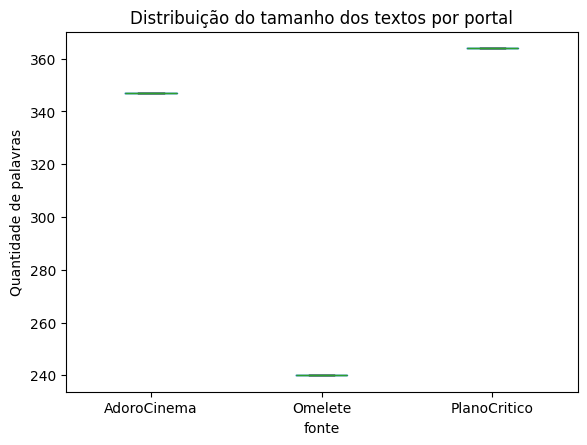

<Figure size 800x500 with 0 Axes>

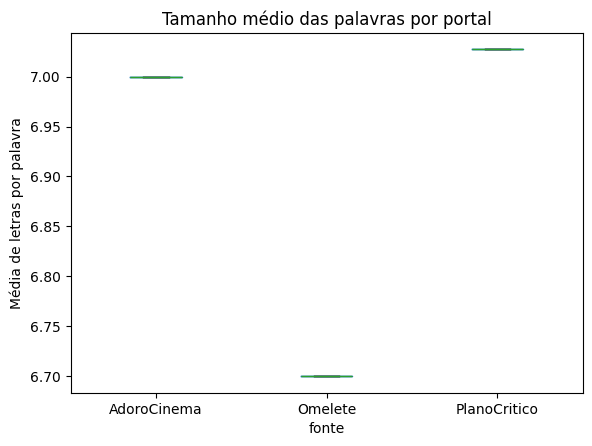

In [ ]:
# --- Visualiza√ß√µes ---
plt.figure(figsize=(8,5))
dados.boxplot(column="qtd_palavras", by="fonte", grid=False)
plt.title("Distribui√ß√£o do tamanho dos textos por portal")
plt.suptitle("")
plt.ylabel("Quantidade de palavras")
plt.show()

plt.figure(figsize=(8,5))
dados.boxplot(column="tam_medio_palavra", by="fonte", grid=False)
plt.title("Tamanho m√©dio das palavras por portal")
plt.suptitle("")
plt.ylabel("M√©dia de letras por palavra")
plt.show()


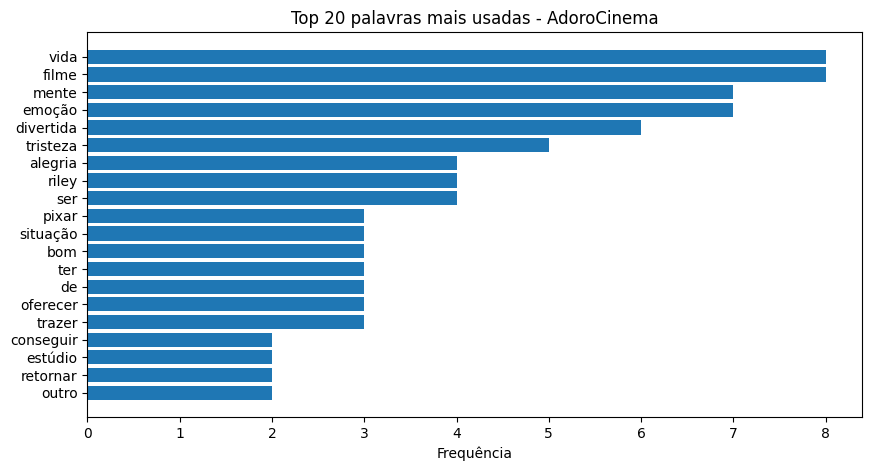

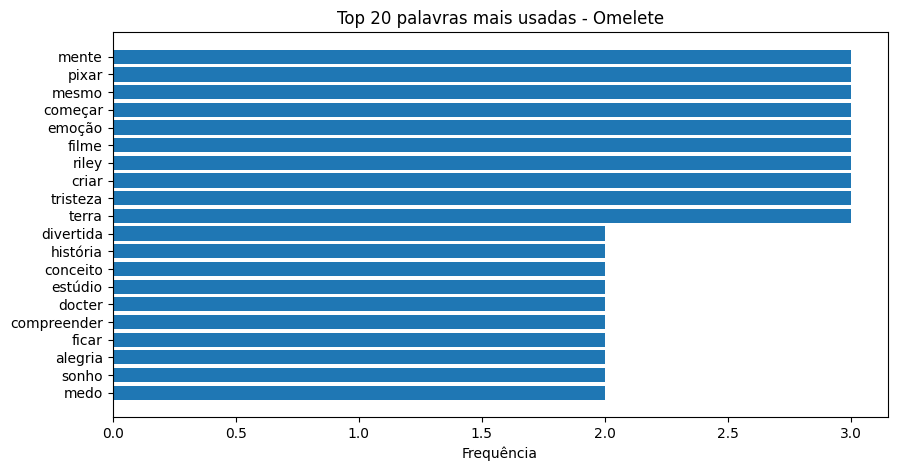

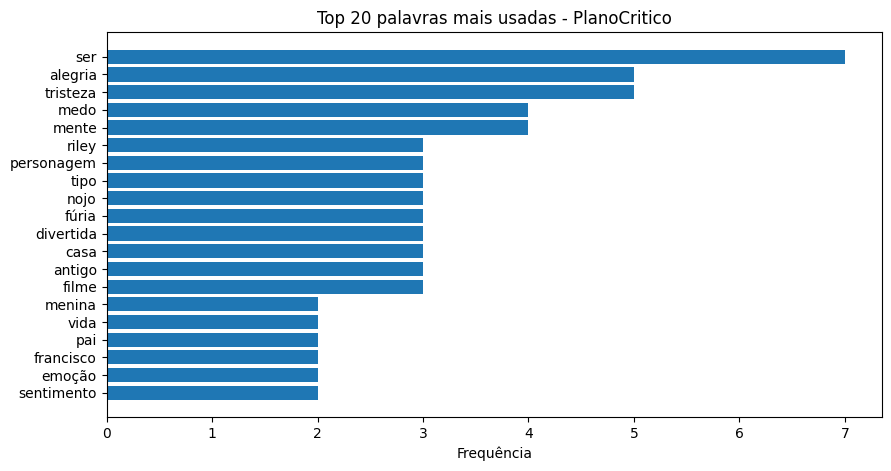

In [ ]:
# --- Top 20 palavras mais frequentes por portal ---
for fonte in dados["fonte"].unique():
    palavras = " ".join(dados.loc[dados["fonte"] == fonte, "tokens_lematizados"]).split()
    freq = Counter(palavras).most_common(20)
    palavras_top, contagens = zip(*freq)

    plt.figure(figsize=(10,5))
    plt.barh(palavras_top[::-1], contagens[::-1])
    plt.title(f"Top 20 palavras mais usadas - {fonte}")
    plt.xlabel("Frequ√™ncia")
    plt.show()


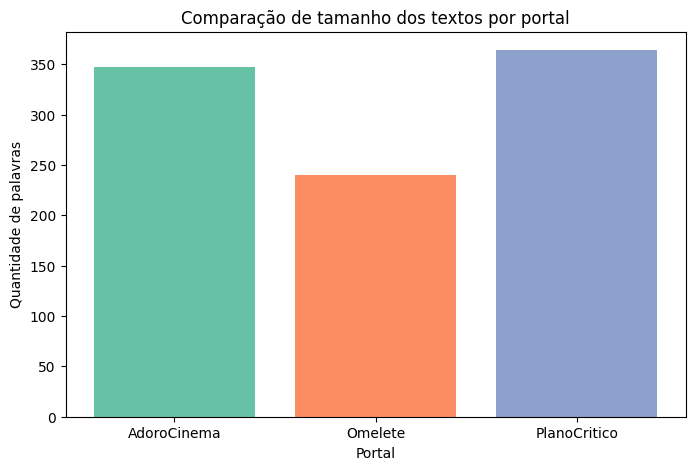

In [ ]:
# Compara√ß√£o do tamanho m√©dio dos textos por portal
plt.figure(figsize=(8, 5))
plt.bar(dados["fonte"], dados["qtd_palavras"], color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Compara√ß√£o de tamanho dos textos por portal")
plt.xlabel("Portal")
plt.ylabel("Quantidade de palavras")
plt.show()

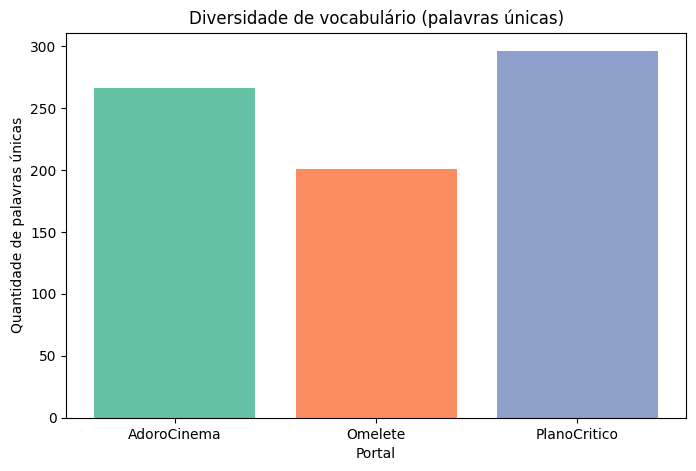

In [ ]:
# Compara√ß√£o da diversidade de vocabul√°rio
plt.figure(figsize=(8, 5))
plt.bar(dados["fonte"], dados["qtd_unicas"], color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Diversidade de vocabul√°rio (palavras √∫nicas)")
plt.xlabel("Portal")
plt.ylabel("Quantidade de palavras √∫nicas")
plt.show()


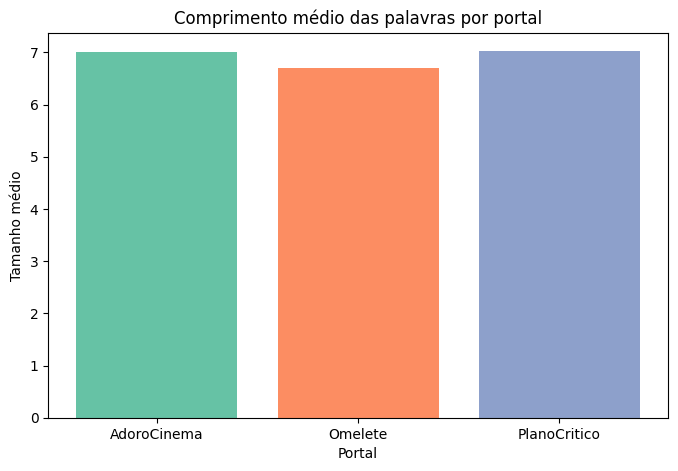

In [ ]:
# Compara√ß√£o do tamanho m√©dio das palavras
plt.figure(figsize=(8, 5))
plt.bar(dados["fonte"], dados["tam_medio_palavra"], color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Comprimento m√©dio das palavras por portal")
plt.xlabel("Portal")
plt.ylabel("Tamanho m√©dio")
plt.show()


In [ ]:
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
# ============================================================
#  Ler os arquivos processados novamente
# ============================================================
adoro = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/PLN/adorocinema_processado.csv")
omelete = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/PLN/omelete_processado.csv")
plano = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/PLN/plano_critico_processado.csv")


In [ ]:
# Unificar os dados em um √∫nico DataFrame para fazer as tarefas
dados = pd.concat([adoro, omelete, plano], ignore_index=True)

In [ ]:
# ============================================================
#  Calcular m√©tricas textuais
# ============================================================
dados["qtd_palavras"] = dados["tokens_lematizados"].apply(lambda x: len(str(x).split()))
dados["qtd_unicas"] = dados["tokens_lematizados"].apply(lambda x: len(set(str(x).split())))
dados["tam_medio_palavra"] = dados["tokens_lematizados"].apply(
    lambda x: np.mean([len(p) for p in str(x).split() if p.isalpha()])
)


In [ ]:
# ============================================================
#  An√°lise de sentimento (polaridade)
# ============================================================
# Fun√ß√£o para detectar polaridade (TextBlob usa modelo treinado em portugu√™s via tradu√ß√£o interna)
def polaridade_texto(texto):
    blob = TextBlob(str(texto))
    return blob.sentiment.polarity

# Aplicar a fun√ß√£o
dados["polaridade"] = dados["tokens_lematizados"].apply(polaridade_texto)

# Criar uma coluna categ√≥rica de sentimento
def classificar_sentimento(p):
    if p > 0.1:
        return "Positivo"
    elif p < -0.1:
        return "Negativo"
    else:
        return "Neutro"

dados["sentimento"] = dados["polaridade"].apply(classificar_sentimento)

print("üìä Resultados com sentimento:")
print(dados[["fonte", "polaridade", "sentimento"]])

üìä Resultados com sentimento:
          fonte  polaridade sentimento
0   AdoroCinema    0.066667     Neutro
1       Omelete    0.104167   Positivo
2  PlanoCritico    0.211111   Positivo


In [ ]:
# ============================================================
#  Matriz de correla√ß√£o num√©rica
# ============================================================
corr = dados[["qtd_palavras", "qtd_unicas", "tam_medio_palavra", "polaridade"]].corr()

print("\n Matriz de Correla√ß√£o: \n")
print(corr)



 Matriz de Correla√ß√£o: 

                   qtd_palavras  qtd_unicas  tam_medio_palavra  polaridade
qtd_palavras           1.000000    0.982523           0.998695    0.387151
qtd_unicas             0.982523    1.000000           0.971735    0.552008
tam_medio_palavra      0.998695    0.971735           1.000000    0.339556
polaridade             0.387151    0.552008           0.339556    1.000000


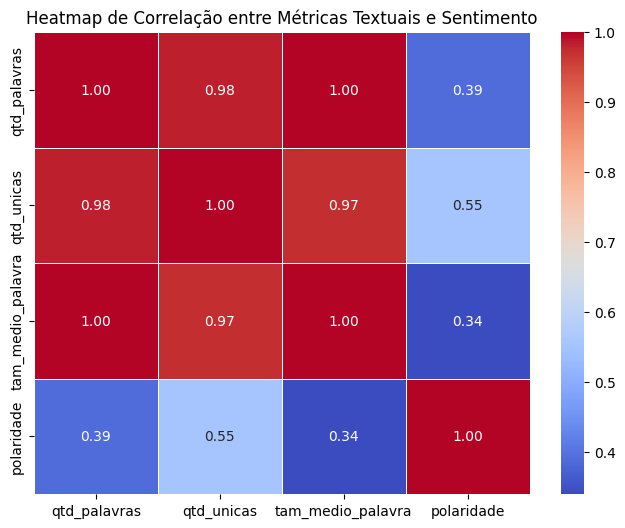

In [ ]:
# ============================================================
#  Heatmap visual das correla√ß√µes
# ============================================================
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correla√ß√£o entre M√©tricas Textuais e Sentimento")
plt.show()


In [ ]:

# ============================================================
#  Salvar resultado final
# ============================================================
caminho_saida = "/content/drive/MyDrive/Colab_Notebooks/PLN/resultados_correlacao.csv"
dados.to_csv(caminho_saida, index=False, encoding="utf-8")
print(f"\n‚úÖ Resultados salvos com sucesso em:\n{caminho_saida}")



‚úÖ Resultados salvos com sucesso em:
/content/drive/MyDrive/Colab_Notebooks/PLN/resultados_correlacao.csv
